# **COVID-19 (Coronavírus): uma análise da situação no Brasil, Paraná e Cascavel/PR**

A COVID-19 é uma doença causado o por um tipo de coronavírus, precisamente o vírus denominado SARS-CoV-2. Os sintomas mais comuns da doença são: febre, tosse seca e cansaço (Para visualizar outros sintomados que podem aparecer: [clique aqui](https://dasa.com.br/coronavirus)). Além disso, cerca de 80% das pessoas infectadas se recuperam sem maiores problemas e em torno de 20% evoluem para quadros mais graves, necessitando de tratamento hospitalar, e pode levar a pessoa infectada a óbito.

As pessoas podem ter COVID-19 através do contato com pessoas infectadas pelo vírus. O vírus se espalha, principalmente, de pessoa a pessoa através de gotículas do nariz e da boca que são expelidas quando a pessoa com COVID-19 tosse, espirra ou fala.

Com isso, tendo o objetivo de informar as pessoas sobre a situação da COVID-19 no Brasil, no Paraná e em Cascavel/PR, vou realizar uma análise dos dados disponibilizados pelo Ministério da Saúde.

## **Obtenção dos Dados**

Os dados utilizados para essa análise estão disponíveis no [Painel sobre o Coronavírus](https://covid.saude.gov.br/) no site do Ministério da Saúde.
Um fator importante a se notar é que no conjunto de dados está dividido em três partes: as primeiras entradas (linhas) são os dados para o Brasil todo, as entradas (linhas) do meio são os dados para cada Estado Brasileiro e as entradas (linhas) finais são para os Municípios Brasileiros. Com isso, quando as entradas (linhas) representam o Brasil todo há valores faltantes para os Estados e Municípios; e quando as entradas (linhas) representam os Estados há valores faltantes para os Municípios.

> Foi necessário realizar uma pré-limpeza no conjunto de dados, pois em algumas entradas haviam caracteres estranhos que não deveriam estar presentes. Com isso, essas entradas foram corrigidas para a forma correta que deveriam estar.

### **Dicionário dos atributos**

**Atributo**|**Descrição**
------------|-------------
`regiao`|Região do Brasil (Norte, Nordeste, Centro-Oeste, Sudeste e Sul); se a região não é especificada, então coloca-se como Brasil.
`estado`|Estados ou Unidades federativas do Brasil.
`municipio`|Munícipios de cada Estado.
`coduf`|Código da Unidade Federativa.
`codmun`|Código do Munícipio.
`codRegiaoSaude`|Código da Região de Saúde.
`nomeRegiaoSaude`|Nome da Região de Saúde.
`data`|Data de notificação.
`semanaEpi`|Semana Epidemiológica.
`populacaoTCU2019`|População estimada do País, Estado ou Município para 2019.
`casosAcumulado`|Acumulado de casos confirmados de COVID-19.
`casosNovos`|Casos novos confirmados de COVID-19 na data de notificação.
`obitosAcumulado`|Acumulado de óbitos pela COVID-19.
`obitosNovos`|Óbitos novos confirmados de COVID-19 na data de notificação.
`Recuperadosnovos`|Total de pessoas recuperadas até a data de notificação.
`emAcompanhamentoNovos`|Casos em acompanhamento.
`interior/metropolitana`|Região interior ou metropolitana.

## **Importando os pacotes e o conjunto de dados**

In [1]:
# Importando os pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

C:\Users\Dino\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Importando o conjunto de dados
df = pd.read_csv("./covid_br_20200819.csv", index_col=0);

## **Análise exploratória dos dados**

**Dimensões do conjunto de dados:**

In [3]:
# Dimensões do conjunto de dados
print("As dimensões do conjunto de dados são:")
print("Entradas (Linhas):\t", df.shape[0])
print("Atributos (Colunas):\t", df.shape[1])

As dimensões do conjunto de dados são:
Entradas (Linhas):	 815256
Atributos (Colunas):	 17


**As 5 primeiras e 5 últimas entradas do conjunto de dados:**

In [4]:
# 5 primeiras entradas
df.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
index,,,,,,,,,,,,,,,,,
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,25/02/2020,9,210147125.0,0,0,0,0,NaN,NaN,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,26/02/2020,9,210147125.0,1,1,0,0,NaN,NaN,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,27/02/2020,9,210147125.0,1,0,0,0,NaN,NaN,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,28/02/2020,9,210147125.0,1,0,0,0,NaN,NaN,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,29/02/2020,9,210147125.0,2,1,0,0,NaN,NaN,NaN


In [5]:
# 5 últimas entradas
df.tail()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
index,,,,,,,,,,,,,,,,,
818317,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,15/08/2020,33,3015268.0,135014,1848,1958,23,NaN,NaN,1.0
818318,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,16/08/2020,34,3015268.0,136467,1453,1976,18,NaN,NaN,1.0
818319,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,17/08/2020,34,3015268.0,138735,2268,2042,66,NaN,NaN,1.0
818320,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,18/08/2020,34,3015268.0,140170,1435,2097,55,NaN,NaN,1.0
818321,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,19/08/2020,34,3015268.0,141762,1592,2148,51,NaN,NaN,1.0


**Nomes dos atributos (colunas) do conjunto de dados:**

In [6]:
# Nome dos atributos no conjunto de dados
df.columns

Index(['regiao', 'estado', 'municipio', 'coduf', 'codmun', 'codRegiaoSaude',
       'nomeRegiaoSaude', 'data', 'semanaEpi', 'populacaoTCU2019',
       'casosAcumulado', 'casosNovos', 'obitosAcumulado', 'obitosNovos',
       'Recuperadosnovos', 'emAcompanhamentoNovos', 'interior/metropolitana'],
      dtype='object')

**Resumo estatístico do conjunto de dados:**

In [7]:
# Resumo estatístico
df.describe()

,coduf,codmun,codRegiaoSaude,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
count,815256.000000,810300.000000,810300.000000,815256.000000,8.152560e+05,8.152560e+05,815256.000000,815256.000000,815256.000000,1.230000e+02,123.000000,810300.000000
mean,32.337178,325049.326667,32372.085946,23.630374,1.288704e+05,5.817595e+02,12.703325,22.948300,0.408598,8.022708e+05,424954.536585,0.069550
std,9.869298,98416.671607,9829.769531,6.043747,3.234182e+06,2.135104e+04,420.158426,798.253734,12.571339,7.881341e+05,266504.225023,0.254386
min,11.000000,110001.000000,11001.000000,9.000000,7.810000e+02,0.000000e+00,-1349.000000,0.000000,-238.000000,2.213000e+04,14062.000000,0.000000
25%,25.000000,251200.000000,25010.000000,18.000000,5.497000e+03,0.000000e+00,0.000000,0.000000,0.000000,1.117385e+05,151450.000000,0.000000
50%,31.000000,314582.500000,31058.500000,24.000000,1.174200e+04,5.000000e+00,0.000000,0.000000,0.000000,5.072000e+05,476759.000000,0.000000
75%,41.000000,411840.000000,41015.000000,29.000000,2.597900e+04,5.300000e+01,1.000000,1.000000,0.000000,1.356796e+06,652696.000000,0.000000
max,76.000000,530010.000000,53001.000000,34.000000,2.101471e+08,3.456652e+06,69074.000000,111100.000000,1595.000000,2.615254e+06,817642.000000,1.000000


**Tipo de cada atributo do conjunto de dados:**

In [8]:
# Tipo de cada atributo
df.dtypes

regiao                     object
estado                     object
municipio                  object
coduf                       int64
codmun                    float64
codRegiaoSaude            float64
nomeRegiaoSaude            object
data                       object
semanaEpi                   int64
populacaoTCU2019          float64
casosAcumulado              int64
casosNovos                  int64
obitosAcumulado             int64
obitosNovos                 int64
Recuperadosnovos          float64
emAcompanhamentoNovos     float64
interior/metropolitana    float64
dtype: object

Como podemos perceber, o atributo `data` está como string (object), assim iremos transformá-lo para o tipo datetime:

In [9]:
# Transformando o atributo data para datetime
df.data = pd.to_datetime(df.data, format='%d/%m/%Y')

df.data.head()

index
0   2020-02-25
1   2020-02-26
2   2020-02-27
3   2020-02-28
4   2020-02-29
Name: data, dtype: datetime64[ns]

Também iremos transformar o atributo `populacaoTCU2019` de *float64* para *int64* (número inteiro):

In [10]:
# Transformando o atributo pouplacaoTCU2019 para int64
df.populacaoTCU2019 = df.populacaoTCU2019.astype('int64')

df.populacaoTCU2019.head()

index
0    210147125
1    210147125
2    210147125
3    210147125
4    210147125
Name: populacaoTCU2019, dtype: int64

**Valores únicos nos atributos `regiao`, `estado` e `municipio`**

In [11]:
print("Valores únicos no atributo regiao:")
print(df.regiao.unique())
print("\n")
print("Valores únicos no atributo estado:")
print(df.estado.unique())
print("\n")
print("Valores únicos no atributo municipio:")
print(df.municipio.unique())

Valores únicos no atributo regiao:
['Brasil' 'Norte' 'Nordeste' 'Sudeste' 'Sul' 'Centro-Oeste']


Valores únicos no atributo estado:
[nan 'RO' 'AC' 'AM' 'RR' 'PA' 'AP' 'TO' 'MA' 'PI' 'CE' 'RN' 'PB' 'PE' 'AL'
 'SE' 'BA' 'MG' 'ES' 'RJ' 'SP' 'PR' 'SC' 'RS' 'MS' 'MT' 'GO' 'DF']


Valores únicos no atributo municipio:
[nan "Alta Floresta D'Oeste" 'Ariquemes' ... 'Vila Boa' 'Vila Propício'
 'Brasília']


**Verificação de valores ausentes no conjunto de dados:**

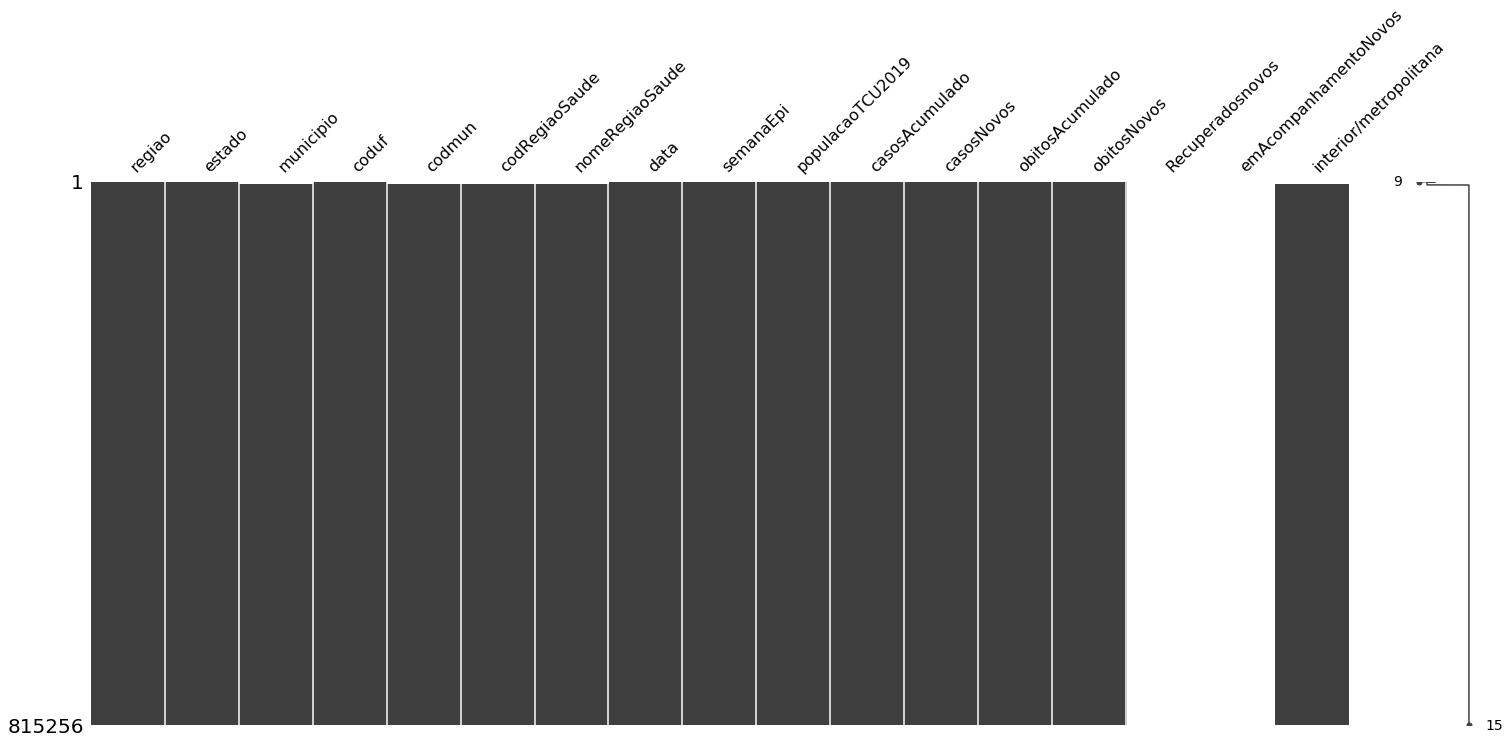

In [12]:
# Verificação de valores ausentes com a matriz de nulidade
msno.matrix(df);

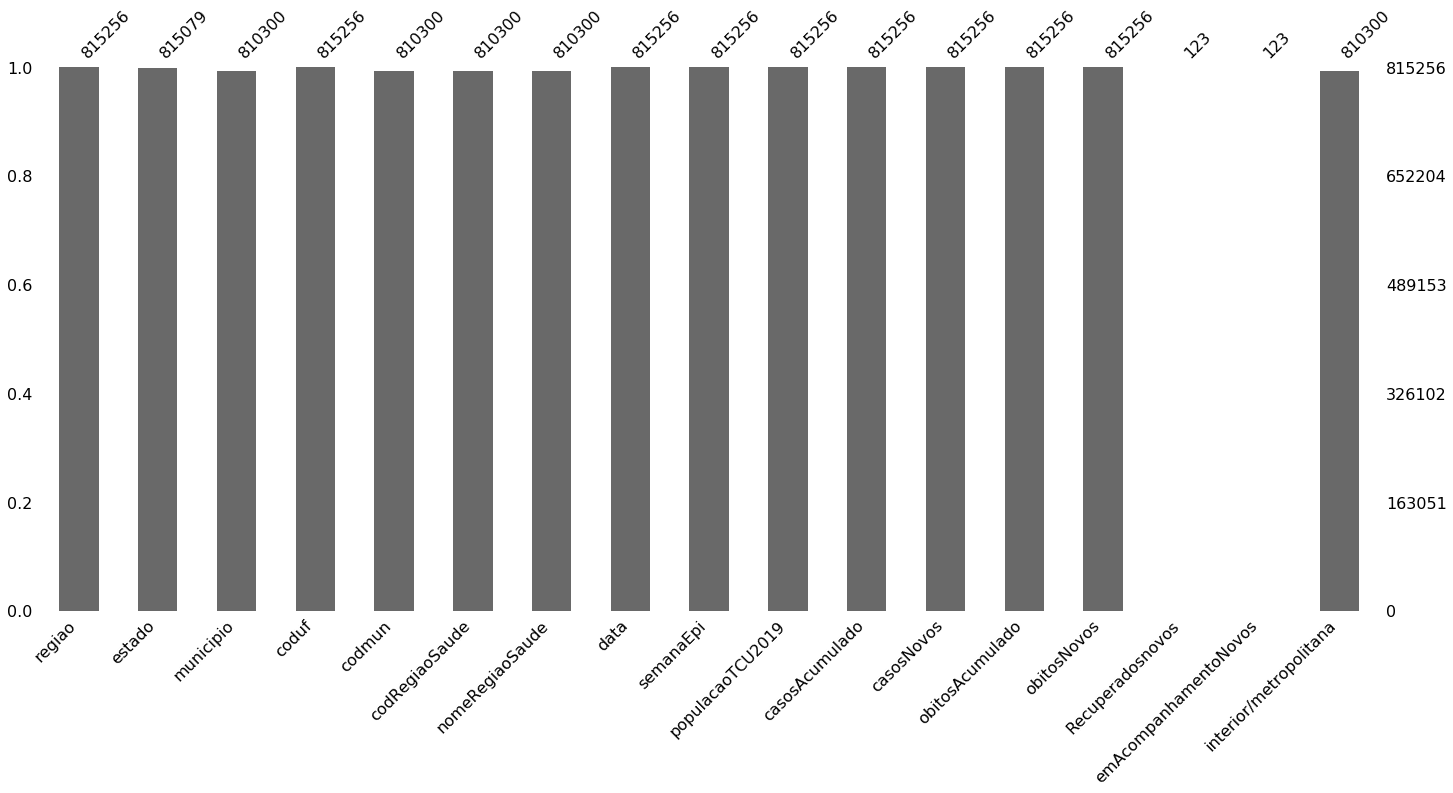

In [13]:
# Gráfico de barras para verificar a nulidade dos atributos
msno.bar(df);

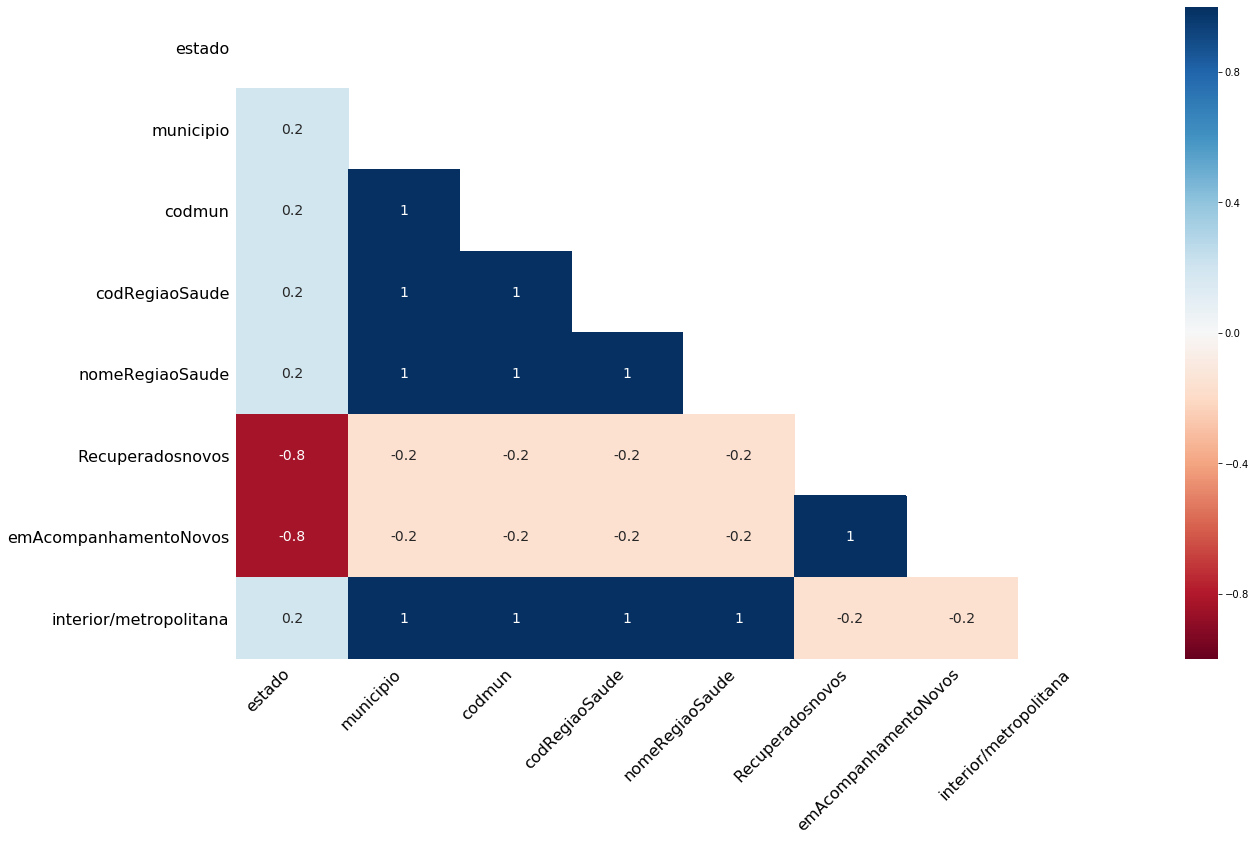

In [14]:
# Heatmap de correlação entre os valores faltantes
msno.heatmap(df);

In [15]:
# Porcentagem de valores faltantes em cada atributo
(df.isnull().sum().sort_values(ascending = False)/ df.shape[0]) * 100

Recuperadosnovos          99.984913
emAcompanhamentoNovos     99.984913
interior/metropolitana     0.607907
nomeRegiaoSaude            0.607907
municipio                  0.607907
codmun                     0.607907
codRegiaoSaude             0.607907
estado                     0.021711
coduf                      0.000000
semanaEpi                  0.000000
data                       0.000000
populacaoTCU2019           0.000000
casosAcumulado             0.000000
casosNovos                 0.000000
obitosAcumulado            0.000000
obitosNovos                0.000000
regiao                     0.000000
dtype: float64

Como podemos perceber pela análise feita, os atributos que possuem valores faltantes são: `estado`, `municipio`, `codmun`, `codRegiaoSaude`, `nomeRegiaoSaude`, `Recuperadosnovos`, `emAcompanhamentoNovos` e `interior/metropolitana`. Ainda, percebe-se que os atributos `Recuperadosnovos` e `emAcompanhamentoNovos` têm maioria de suas entradas como sendo valores faltantes.

Ainda, pelo *heatmap* percebemos que:
- O atributo `municipio` tem correlação **1** com os atributos `interior/metropolitana`, `codRegiaoSaude`, `nomeRegiaoSaude` e `codmun`, portanto onde houver valor faltante no atributo `municipio` também terá nesses outros quatro atributos;
- O atributo `Recuperadosnovos` tem correlação **1** com o atributo `emAcompanhamentoNovos`, portanto onde houver valor faltante no atributo `Recuperadosnovos` também terá nesse outro atributo;

## **A situação da COVID-19 no Brasil**

Nesta seção, faremos uma análise geral da situação da COVID-19 no Brasil.

**Número acumulado de casos confirmados de COVID-19 por região do Brasil:**

In [16]:
# Configurando a visualização
%config InlineBackend.figure_format = 'svg'

# Configurando os parâmetros da fonte dos gráficos
plt.rcParams['font.family'] = 'sans-serif'

# Utilizando a estética do Seaborn
sns.set(style='white')

# Definindo as cores para textos nos gráficos
cic, cie = '#9a9a9a', '#757575'

In [17]:
# Dados a serem plotados
casos_regiao = df.loc[(df.data == '2020-08-19') & df['municipio'].isnull()].groupby(['regiao']).sum().casosAcumulado.reset_index().sort_values(by='casosAcumulado', ascending=False)[1:6]
labels = casos_regiao.regiao

In [18]:
casos_regiao = df.loc[(df.data == '2020-08-19') & df['municipio'].isnull()].groupby(['regiao']).sum().casosAcumulado.reset_index().sort_values(by='casosAcumulado', ascending=False)[1:6]
casos_regiao

,regiao,casosAcumulado
4,Sudeste,1208618
2,Nordeste,1050491
3,Norte,489234
1,Centro-Oeste,367672
5,Sul,340637


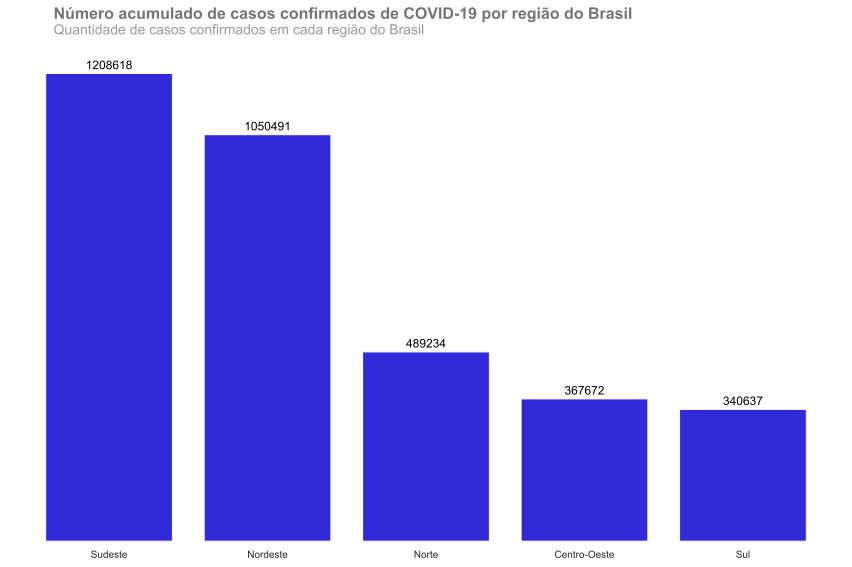

In [62]:
# Criando a figura para o gráfico
fig, ax = plt.subplots(figsize=(12,8))

# Plotar gráfico
casos_reg = ax.bar('regiao', 'casosAcumulado', data=casos_regiao, color="#322ad9")

# Remover eixos e grid
ax.spines['right'].set_visible(False);
ax.spines['left'].set_visible(False);
ax.spines['top'].set_visible(False);
ax.spines['bottom'].set_visible(False);

# Função para labels automaticamente
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(
                    '{}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2,  height),
                    xytext=(0, 2),  # offset
                    textcoords="offset points",
                    ha='center',
                    va='bottom',
                    fontsize=12,
                    color="black",
                    )

# Adiciona os labels em cima das barras
autolabel(casos_reg)

# Removendo xticks e yticks dos eixos
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)

# Remover o eixo y
plt.gca().axes.get_yaxis().set_visible(False)

# Título
plt.text(-0.35, 1350000, "Número acumulado de casos confirmados de COVID-19 por região do Brasil", fontsize=16, color=cie, weight='bold');

# Subtítulo
plt.text(-0.35, 1310000, "Quantidade de casos confirmados em cada região do Brasil", fontsize=14, color=cic);

# Definir tamanho dos rótulos do eixo x
plt.rc('xtick', labelsize=10)

fig.tight_layout()

Assim, percebemos que a região com **maior** número de casos confirmados é a **Sudeste** e a com **menor** número é a **Sul**.

**Número acumulado de casos confirmados no Brasil:**

In [20]:
# Dados a serem plotados
casos_br = df.loc[df.regiao == 'Brasil', 'casosAcumulado'].reset_index(drop=True)

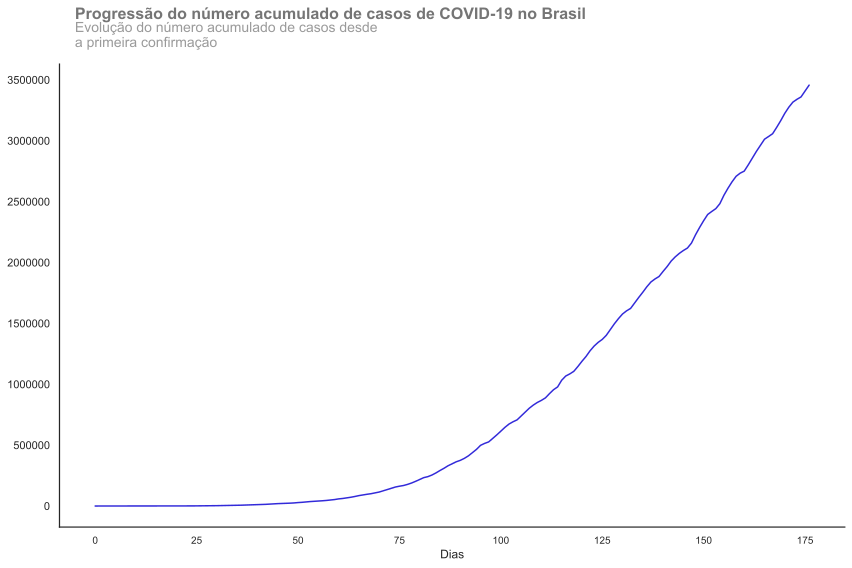

In [64]:
# Plotando o gráfico
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(casos_br, color="#322ad9")

# Removendo ticks do eixo x
plt.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=True)

# Removendo os eixos
ax.spines['right'].set_visible(False);
ax.spines['top'].set_visible(False);

# Título
ax.text(-5, 4000000, "Progressão do número acumulado de casos de COVID-19 no Brasil", color=cie, fontsize=16, weight='bold')

# Subtítulo
ax.text(-5, 3770000, "Evolução do número acumulado de casos desde\na primeira confirmação", color=cic, fontsize=14)

# Formatação dos eixos
ax.set_xlabel('Dias', fontsize=12)
plt.tight_layout()

Com o gráfico, percebe-se que o número acumulado de casos confirmados de COVID-19 ainda está com tendência de crescimento no Brasil.

**Número de novos casos confirmados de COVID-19 no Brasil por dia:**

In [22]:
# Dados a serem plotados
nvcasos_br = df.loc[df.regiao == 'Brasil', 'casosNovos'].reset_index(drop=True)

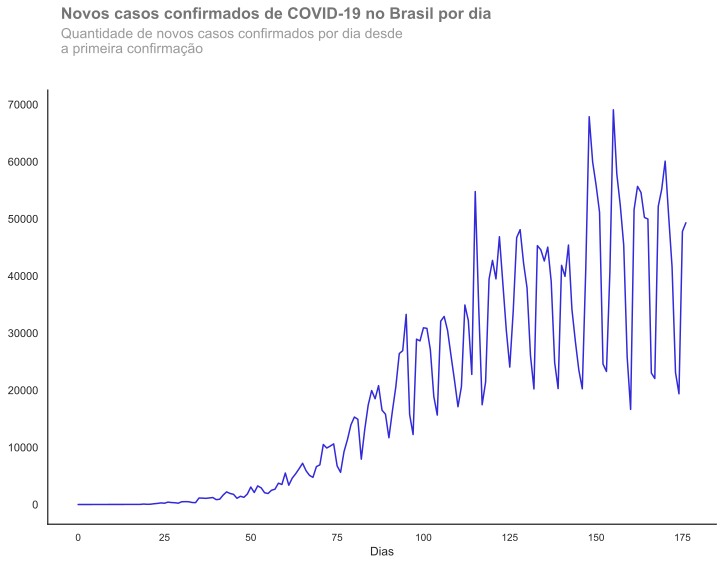

In [23]:
# Plotando o gráfico
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(nvcasos_br, color="#322ad9");

# Removendo ticks do eixo x
plt.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=True)

# Removendo os eixos
ax.spines['right'].set_visible(False);
ax.spines['top'].set_visible(False);

# Título
ax.text(-5, 85000, "Novos casos confirmados de COVID-19 no Brasil por dia", fontsize=16, color=cie, weight='bold')

# Subtítulo
ax.text(-5, 79000, "Quantidade de novos casos confirmados por dia desde\na primeira confirmação", fontsize=14, color=cic)

# Formatação dos eixos
ax.set_xlabel('Dias', fontsize=12);

Pelo gráfico, percebemos que há uma grande oscilação de novos casos de COVID-19 por dia.

Ainda, podemos ver qual a **maior quantidade de casos novos** registradas em um dia:

In [24]:
print("A maior quantidade de casos novos registrados em um dia foi de {} e occoreu no dia {} da pandemia".format(nvcasos_br.max(), nvcasos_br.idxmax()))

A maior quantidade de casos novos registrados em um dia foi de 69074 e occoreu no dia 155 da pandemia


**Número acumulado de óbitos pela COVID-19 no Brasil:**

In [25]:
# Dados a serem plotados
obitos_br = df.loc[df.regiao == 'Brasil', 'obitosAcumulado'].reset_index(drop=True)

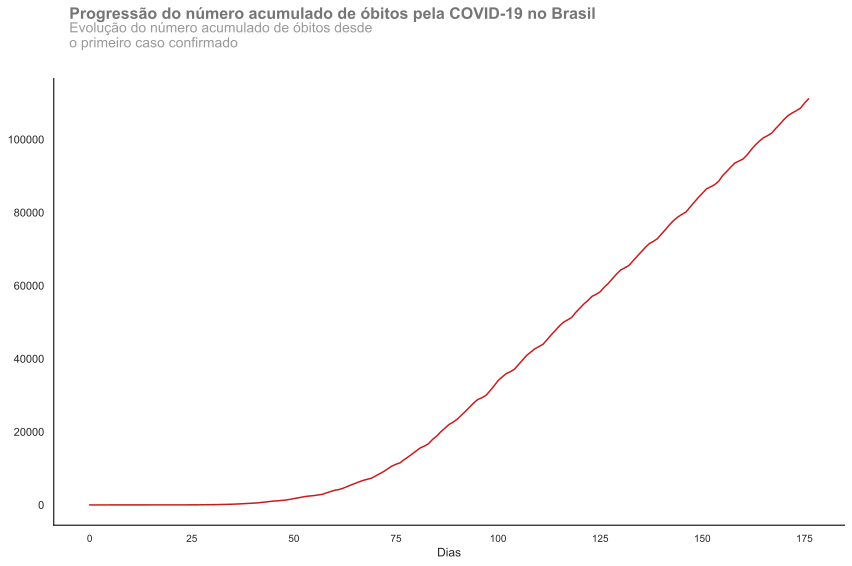

In [26]:
# Plotando o gráfico
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(obitos_br, color="#cc1919")

# Removendo ticks do eixo x
plt.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=True)

# Removendo os eixos
ax.spines['right'].set_visible(False);
ax.spines['top'].set_visible(False);

# Título
ax.text(-5, 133000, "Progressão do número acumulado de óbitos pela COVID-19 no Brasil", color=cie, fontsize=16, weight='bold')

# Subtítulo
ax.text(-5, 125200, "Evolução do número acumulado de óbitos desde\no primeiro caso confirmado", color=cic, fontsize=14)

# Formatação dos eixos
ax.set_xlabel('Dias', fontsize=12)
plt.tight_layout()

Pelo gráfico, percebe-se que o número acumulado de óbitos continua com tendência de crescimento.

**Número de novos óbitos pela COVID-19 no Brasil por dia:**

In [27]:
# Dados a serem plotados
nvobitos_br = df.loc[df.regiao == 'Brasil', 'obitosNovos'].reset_index(drop=True)

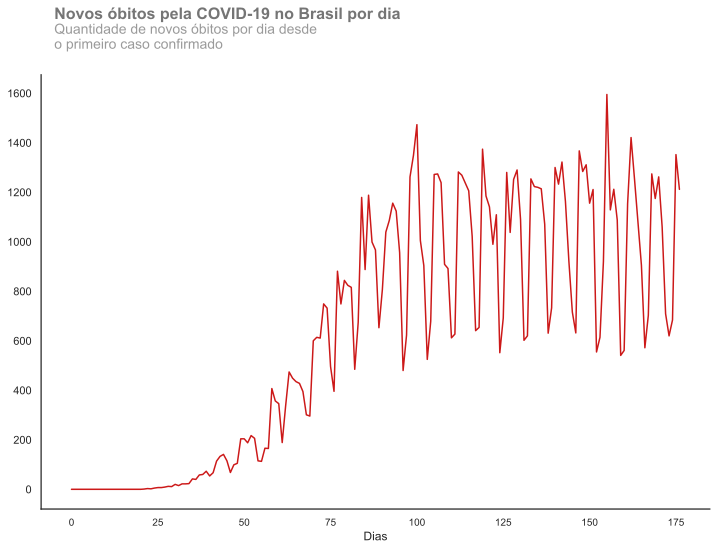

In [28]:
# Plotando o gráfico
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(nvobitos_br, color="#cc1919");

# Removendo ticks do eixo x
plt.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=True)

# Removendo os eixos
ax.spines['right'].set_visible(False);
ax.spines['top'].set_visible(False);

# Título
ax.text(-5, 1900, "Novos óbitos pela COVID-19 no Brasil por dia", fontsize=16, color=cie, weight='bold')

# Subtítulo
ax.text(-5, 1780, "Quantidade de novos óbitos por dia desde\no primeiro caso confirmado", fontsize=14, color=cic)

# Formatação dos eixos
ax.set_xlabel('Dias', fontsize=12);

Pelo gráfico, percebemos que há uma grande oscilação de novos óbitos pela COVID-19 por dia.

Ainda, podemos ver qual a **maior quantidade de óbitos** registrados em um dia:

In [29]:
print("A maior quantidade de novos óbitos registrados em um dia foi de {} e occoreu no dia {} da pandemia".format(nvobitos_br.max(), nvobitos_br.idxmax()))

A maior quantidade de novos óbitos registrados em um dia foi de 1595 e occoreu no dia 155 da pandemia


Um ponto interessante a se notar é que no mesmo dia em que ocorreu os maior número de novos casos de COVID-19 registrados, também foi o dia em que ocorreu o maior número de novos óbitos pela doença.

**Comparativo entre o número acumulado de casos confirmados, de óbitos e de pessoas recuperadas:**

In [30]:
# Dados a serem plotados
dici = {"Tipo": ["Casos Confirmados", "Óbitos", "Pessoas Recuperadas"],
        "Acumulado": [df.loc[df.regiao == 'Brasil', 'casosAcumulado'].max(), df.loc[df.regiao == 'Brasil', 'obitosAcumulado'].max(), df.loc[df.regiao == 'Brasil', 'Recuperadosnovos'].max()]}

df_comp = pd.DataFrame(data=dici)

df_comp.Acumulado = df_comp.Acumulado.astype('int64')

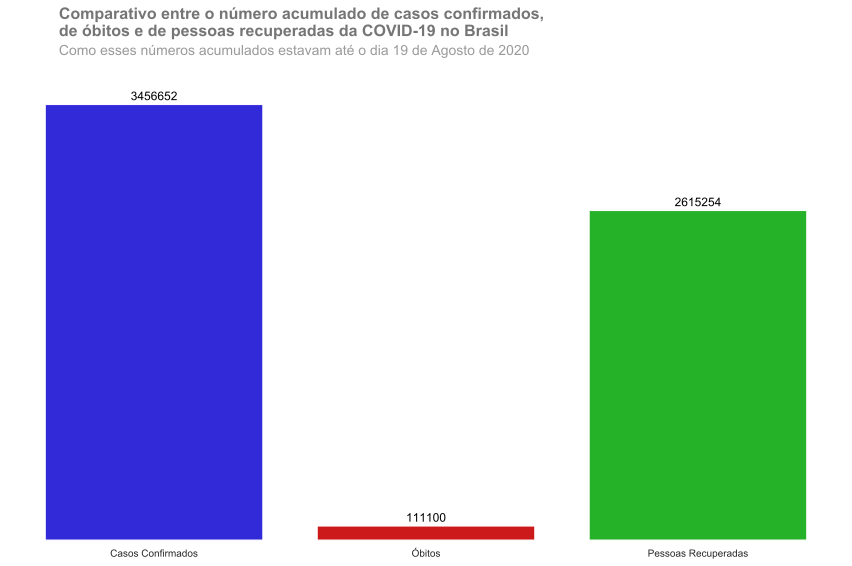

In [31]:
# Plotando o gráfico
fig, ax = plt.subplots(figsize=(12, 8))

comp = ax.bar('Tipo', 'Acumulado', data=df_comp, color=['#322ad9', '#cc1919', '#25b128'])

# Remover eixos e grid
ax.spines['right'].set_visible(False);
ax.spines['left'].set_visible(False);
ax.spines['top'].set_visible(False);
ax.spines['bottom'].set_visible(False);

# Função para labels automaticamente
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(
                    '{}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2,  height),
                    xytext=(0, 2),  # offset
                    textcoords="offset points",
                    ha='center',
                    va='bottom',
                    fontsize=12,
                    color="Black",
                    )

# Adiciona os labels em cima das barras
autolabel(comp)

# Removendo xticks e yticks dos eixos
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)

# Remover o eixo y
plt.gca().axes.get_yaxis().set_visible(False)

# Título
plt.text(-0.35, 4000000, "Comparativo entre o número acumulado de casos confirmados,\nde óbitos e de pessoas recuperadas da COVID-19 no Brasil", fontsize=16, color=cie, weight='bold');

# Subtítulo
plt.text(-0.35, 3850000, "Como esses números acumulados estavam até o dia 19 de Agosto de 2020", fontsize=14, color=cic);

# Definir tamanho dos rótulos do eixo x
plt.rc('xtick', labelsize=10)

fig.tight_layout()

**Estado com maior e menor número de casos:**

In [32]:
print("Número acumulado de casos confirmados de COVID-19 por Estado\nno dia 19 de Agosto de 2020 em ordem descrescente:")
df.loc[(df.data == '2020-08-19') & (df.municipio.isnull())].groupby(['estado']).sum().casosAcumulado.reset_index().sort_values(by='casosAcumulado', ascending=False)

Número acumulado de casos confirmados de COVID-19 por Estado
no dia 19 de Agosto de 2020 em ordem descrescente:


,estado,casosAcumulado
25,SP,721377
4,BA,224659
18,RJ,202993
5,CE,201201
13,PA,182231
10,MG,181158
6,DF,141762
9,MA,140571
23,SC,126850
15,PE,115217


Assim, percebe-se que, no dia 19 de Agosto de 2020, o estado de **São Paulo** é o que apresenta o maior número de casos confirmados com **721.377 casos** e o estado com o menor número de casos confirmados é o **Acre** com **23.146 casos**.

**Casos confirmados nos Munícipios do Brasil**

In [33]:
# Criando um conjunto de dados para os munícipios
df_mun = df.loc[(df.data == '2020-08-19') & (df.municipio.notnull())]

df_mun = df_mun[['estado', 'municipio', 'casosAcumulado']]

In [34]:
# Municípios sem casos
print("Munícipios que não apresentaram casos confirmados de COVID-19 até o dia 19 de Agosto de 2020:")
pd.set_option('display.max_rows', None)
df_mun.loc[df.casosAcumulado == 0]

Munícipios que não apresentaram casos confirmados de COVID-19 até o dia 19 de Agosto de 2020:


,estado,municipio,casosAcumulado
index,,,
281333,BA,Brotas de Macaúbas,0
297685,BA,Ipupiara,0
314183,BA,Novo Horizonte,0
335937,MG,Alagoa,0
339003,MG,Antônio Prado de Minas,0
344405,MG,Berizal,0
347325,MG,Botumirim,0
350537,MG,Camacho,0
352581,MG,Canaã,0


In [35]:
# 10 municípios com mais casos confirmados
pd.reset_option('display.max_rows')
print("Os 10 Municípios do Brasil que apresentaram maior número absoluto de casos confirmados de COVID-19 até o dia 19 de Agosto de 2020:")
df_mun.loc[df_mun.casosAcumulado > 0].sort_values(by='casosAcumulado', ascending=False).head(10)

Os 10 Municípios do Brasil que apresentaram maior número absoluto de casos confirmados de COVID-19 até o dia 19 de Agosto de 2020:


,estado,municipio,casosAcumulado
index,,,
566033,SP,São Paulo,240115
818321,DF,Brasília,141762
480185,RJ,Rio de Janeiro,83735
322067,BA,Salvador,70067
144239,CE,Fortaleza,45257
21453,AM,Manaus,40050
262499,SE,Aracaju,32012
25541,RR,Boa Vista,30214
239139,PE,Recife,30050


In [36]:
# 10 municípios com menos casos confirmados
print("Os 10 Municípios do Brasil que apresentaram menor número absoluto de casos confirmados de COVID-19 até o dia 19 de Agosto de 2020:")
df_mun.loc[df_mun.casosAcumulado > 0].sort_values(by='casosAcumulado', ascending=False).tail(10)

Os 10 Municípios do Brasil que apresentaram menor número absoluto de casos confirmados de COVID-19 até o dia 19 de Agosto de 2020:


,estado,municipio,casosAcumulado
index,,,
394629,MG,José Gonçalves de Minas,1
351705,MG,Campo Azul,1
274033,BA,Érico Cardoso,1
564427,SP,São João do Pau d'Alho,1
806495,GO,Nova Roma,1
335791,MG,Aiuruoca,1
713493,RS,Linha Nova,1
797589,GO,Guarinos,1
554353,SP,Ribeirão Corrente,1


No entanto, podemos verificar se há mais Municípios com apenas 1 caso confirmado:

In [37]:
# Munícipios com apenas 1 caso
print("Municípios do Brasil com apenas 1 caso confirmado de COVID-19 até o dia 19 de Agosto de 2020:")
df_mun.loc[df_mun.casosAcumulado == 1]

Municípios do Brasil com apenas 1 caso confirmado de COVID-19 até o dia 19 de Agosto de 2020:


,estado,municipio,casosAcumulado
index,,,
61457,TO,Mateiros,1
86131,MA,Lagoa do Mato,1
127741,PI,Riacho Frio,1
206581,PB,Ouro Velho,1
207311,PB,Pedra Branca,1
274033,BA,Érico Cardoso,1
286735,BA,Caturama,1
335791,MG,Aiuruoca,1
339879,MG,Araponga,1


## **A Situação da COVID-19 no estado do Paraná**

Nesta seção, faremos uma análise geral para a situação da COVID-19 no estado do Paraná.

Antes de iniciar a análise é necessário criarmos um conjunto de dados apenas para o Paraná. Assim:

In [38]:
# Criando o dataset para o Paraná
df_pr = df.loc[df.estado == 'PR'].reset_index()
df_pr = df_pr.drop(['index'], axis=1)

**Número acumulado de casos confirmados no Paraná:**

In [39]:
# Dados a serem plotados
casos_pr = df_pr.loc[df_pr.municipio.isnull(), 'casosAcumulado']

Após quantos dias do primeiro caso confirmado no Brasil, o Paraná teve o primeiro caso confirmado:

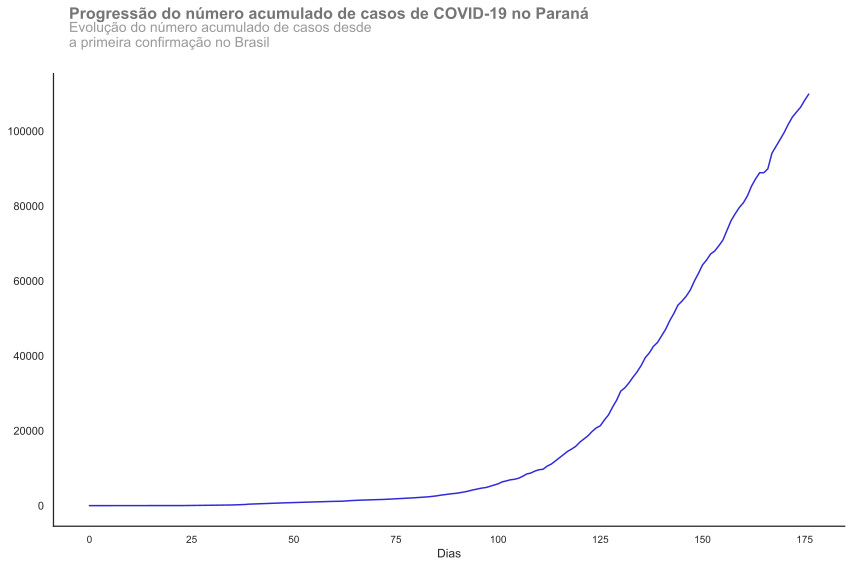

In [66]:
# Plotando o gráfico
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(casos_pr, color="#322ad9");

# Removendo ticks do eixo x
plt.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=True);

# Removendo os eixos
ax.spines['top'].set_visible(False);
ax.spines['right'].set_visible(False);

# Plotar título
ax.text(-5, 130000, "Progressão do número acumulado de casos de COVID-19 no Paraná", fontsize=16, color=cie, fontweight='bold');

# Plotar subtítulo
ax.text(-5, 122500, "Evolução do número acumulado de casos desde\na primeira confirmação no Brasil", fontsize=14, color=cic);

# Formatação dos eixos
ax.set_xlabel('Dias', fontsize=12)

plt.tight_layout();

Como podemos perceber pelo gráfico, o número acumulado de casos confirmados de COVID-19 no Paraná ainda apresenta tendência de crescimento. Isso indica que a doença ainda está se espalhando no Estado.

Ainda:

In [41]:
print("O Paraná teve o primeiro caso confirmado após {} dias que o Brasil confirmou o primeiro caso.".format(df_pr.loc[df_pr.municipio.isnull() & (df_pr.casosAcumulado > 0)].index[0]))
print("E nesse dia foram confirmados {} casos no Paraná.".format(df_pr.loc[df_pr.municipio.isnull() & (df_pr.casosAcumulado > 0), 'casosAcumulado'].iloc[0]))

O Paraná teve o primeiro caso confirmado após 16 dias que o Brasil confirmou o primeiro caso.
E nesse dia foram confirmados 6 casos no Paraná.


**Número de novos casos confirmados de COVID-19 no Paraná por dia:**

In [42]:
# Dados a serem plotar
nvcasos_pr = df_pr.loc[df_pr.municipio.isnull(), 'casosNovos']

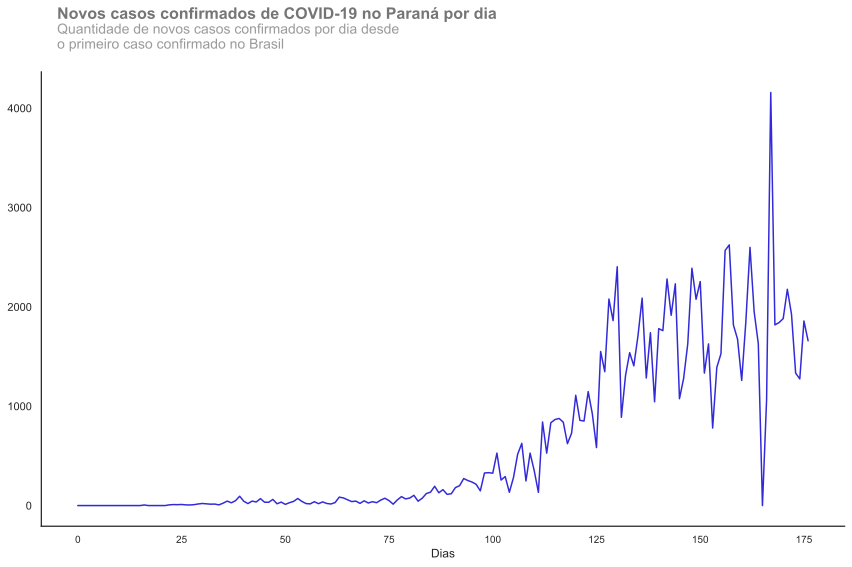

In [43]:
# Plotando o gráfico
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(nvcasos_pr, color="#322ad9");

# Removendo ticks do eixo x
plt.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=True);

# Removendo os eixos
ax.spines['top'].set_visible(False);
ax.spines['right'].set_visible(False);

# Plotar título
ax.text(-5, 4900, "Novos casos confirmados de COVID-19 no Paraná por dia", fontsize=16, fontweight='bold', color=cie);

# Plotar subtítulo
ax.text(-5, 4600, "Quantidade de novos casos confirmados por dia desde\no primeiro caso confirmado no Brasil", fontsize=14, color=cic);

# Formatação dos eixos
ax.set_xlabel('Dias', fontsize=12)

plt.tight_layout();

Como podemos perceber pelo gráfico, há bastante oscilação no número de novos casos confirmados de COVID-19 no Paraná, ainda nota-se uma leve tendência de crescimento nos novos casos.

**Número acumulado de óbitos pela COVID-19 no Paraná:**

In [44]:
# Dados a serem plotados
obitos_pr = df_pr.loc[df_pr.municipio.isnull(), 'obitosAcumulado']

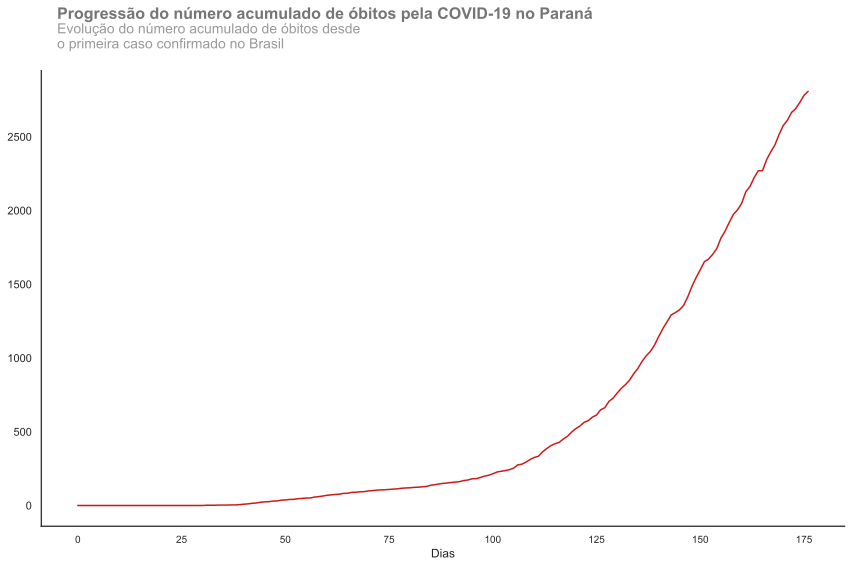

In [45]:
# Plotando o gráfico
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(obitos_pr, color="#cc1919");

# Removendo ticks do eixo x
plt.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=True);

# Removendo os eixos
ax.spines['top'].set_visible(False);
ax.spines['right'].set_visible(False);

# Plotar título
ax.text(-5, 3300, "Progressão do número acumulado de óbitos pela COVID-19 no Paraná", fontsize=16, fontweight='bold', color=cie);

# Plotar subtítulo
ax.text(-5, 3100, "Evolução do número acumulado de óbitos desde\no primeira caso confirmado no Brasil", fontsize=14, color=cic);

# Formatação dos eixos
ax.set_xlabel('Dias', fontsize=12)

plt.tight_layout();

Como podemos notar pelo gráfico, o número acumulado de óbitos ainda apresenta tendência de crescimento no Paraná.

Ainda:

In [46]:
print("O Paraná teve o primeiro óbito após {} dias que o Brasil confirmou o primeiro caso.".format(df_pr.loc[df_pr.municipio.isnull() & (df_pr.obitosAcumulado > 0)].index[0]))
print("E nesse dia foram confirmados {} óbitos no Paraná.".format(df_pr.loc[df_pr.municipio.isnull() & (df_pr.obitosAcumulado > 0), 'obitosAcumulado'].iloc[0]))

O Paraná teve o primeiro óbito após 31 dias que o Brasil confirmou o primeiro caso.
E nesse dia foram confirmados 2 óbitos no Paraná.


**Número de novos óbitos pela COVID-19 no Paraná por dia:**

In [47]:
# Dados a serem plotados
nvobitos_pr = df_pr.loc[df_pr.municipio.isnull(), "obitosNovos"]

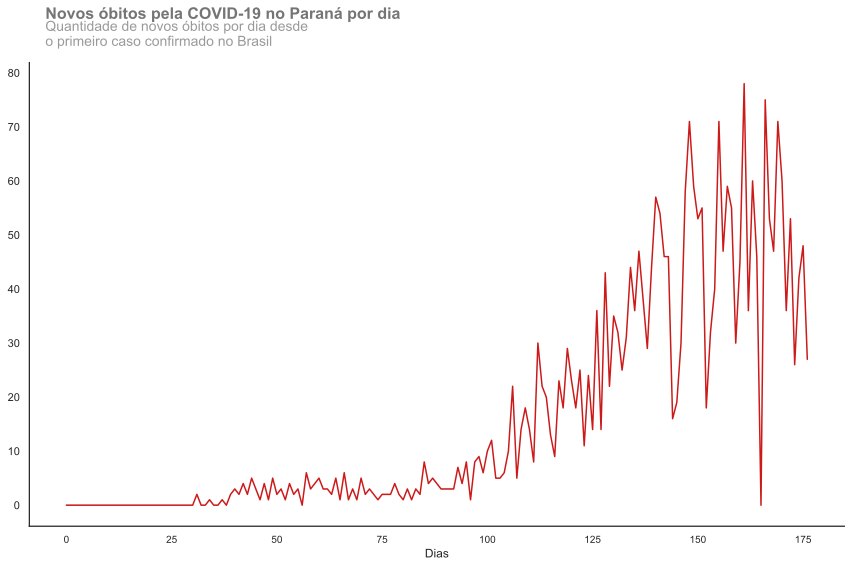

In [48]:
# Plotando o gráfico
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(nvobitos_pr, color="#cc1919");

# Removendo ticks do eixo x
plt.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=True);

# Removendo os eixos
ax.spines['top'].set_visible(False);
ax.spines['right'].set_visible(False);

# Plotar título
ax.text(-5, 90, "Novos óbitos pela COVID-19 no Paraná por dia", fontsize=16, fontweight='bold', color=cie);

# Plotar subtítulo
ax.text(-5, 85, "Quantidade de novos óbitos por dia desde\no primeiro caso confirmado no Brasil", fontsize=14, color=cic);

# Formatação dos eixos
ax.set_xlabel('Dias', fontsize=12)

plt.tight_layout();

Como podemos visualizar pelo gráfico, há bastante oscilação no número de novos óbitos pela COVID-19 no Paraná, ainda nota-se uma leve tendência de crescimento nos novos óbitos. Outro fator estranho a se notar é que existe alguns óbitos "negativos", no entanto isso provavelmente ocorre, pois foi notificado algum óbito como sendo devido à COVID-19 e, posteriormente, retificaram essa notificação.

**Casos confirmados nos Munícipios do Paraná**

Iremos verificar os municípios que apresentaram a maior e a menor quantidade casos confirmados de COVID-19 no estado do Paraná.

Assim, os municípios que apresentaram a maior quantidade de casos foram:

In [49]:
# 10 Munícipios com maior número de casos
print("Os 10 Municípios do Paraná que apresentaram maior número absoluto de casos confirmados de COVID-19 até o dia 19 de Agosto de 2020:")
df_pr.loc[(df_pr.data == '2020-08-19') & df_pr.municipio.notnull(), ['municipio', 'casosAcumulado']].sort_values(by='casosAcumulado', ascending=False).head(10)

Os 10 Municípios do Paraná que apresentaram maior número absoluto de casos confirmados de COVID-19 até o dia 19 de Agosto de 2020:


,municipio,casosAcumulado
13754,Curitiba,24856
10104,Cascavel,5649
27916,Londrina,4708
30544,Maringá,4166
17404,Foz do Iguaçu,3158
36968,Paranaguá,2896
3388,Araucária,2353
11564,Colombo,2245
8644,Campo Largo,2080
38720,Pinhais,2038


Os municípios que apresentaram a menor quando de casos confirmados foram:

In [50]:
# 10 Munícipios com menor número de casos
print("Os 10 Municípios do Paraná que apresentaram menor número absoluto de casos confirmados de COVID-19 até o dia 19 de Agosto de 2020:")
df_pr.loc[(df_pr.data == '2020-08-19') & df_pr.municipio.notnull(), ['municipio', 'casosAcumulado']].sort_values(by='casosAcumulado', ascending=False).tail(10)

Os 10 Municípios do Paraná que apresentaram menor número absoluto de casos confirmados de COVID-19 até o dia 19 de Agosto de 2020:


,municipio,casosAcumulado
40910,Porto Rico,3
57700,Alto Paraíso,3
39012,Pinhal de São Bento,3
52006,São Pedro do Paraná,3
45874,Rosário do Ivaí,2
16674,Flor da Serra do Sul,2
33318,Nova Aliança do Ivaí,1
49524,São Carlos do Ivaí,1
26894,Laranjal,1
18134,Godoy Moreira,0


Ainda, podemos verificar se há mais municípios do Paraná com apenas 2 casos confirmados:

In [51]:
# Munícipios com apenas 2 casos
print("Municípios do Paraná com apenas 3 casos confirmados de COVID-19 até o dia 19 de Agosto de 2020:")
df_pr.loc[(df_pr.data == '2020-08-19') & (df_pr.casosAcumulado == 3), ['municipio', 'casosAcumulado']]

Municípios do Paraná com apenas 3 casos confirmados de COVID-19 até o dia 19 de Agosto de 2020:


,municipio,casosAcumulado
39012,Pinhal de São Bento,3
40910,Porto Rico,3
44998,Rio Branco do Ivaí,3
52006,São Pedro do Paraná,3
57700,Alto Paraíso,3


## **A Situação da COVID-19 no munícipio de Cascavel/PR**

Nesta seção, será feito uma análise da situação da COVID-19 no município de Cascavel no estado do Paraná.

Antes de iniciar a análise é necessário criar um conjunto de dados apenas para Cascavel. Assim:

In [52]:
# Criando o conjunto de dados
df_cvel = df.loc[(df.municipio == 'Cascavel') & (df.estado == 'PR')].reset_index()
df_cvel = df_cvel.drop('index', axis=1)

> Diferente das análises anteriores para Cascavel/PR os dados começaram a ser coletados apenas no dia 23 de Março de 2020.

**Número acumulado de casos confirmados em Cascavel/PR:**

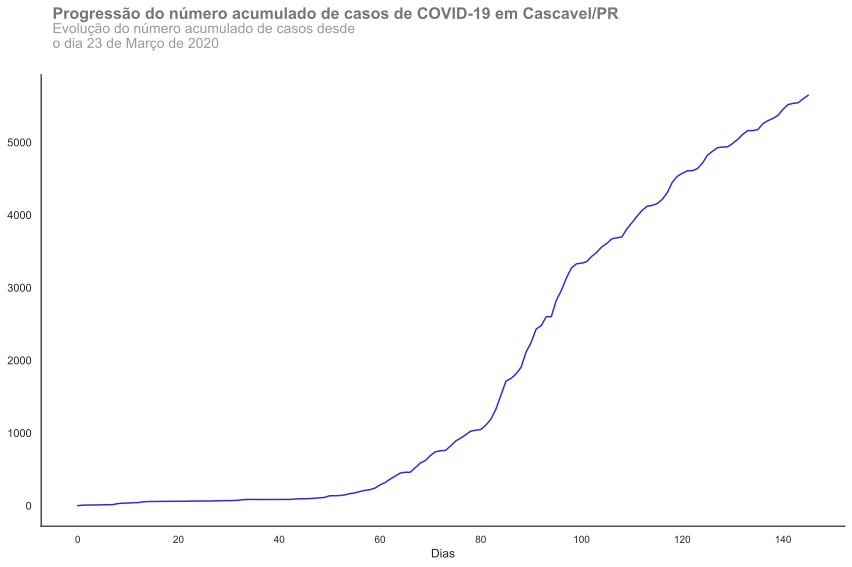

In [68]:
# Construindo o gráfico
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(df_cvel.casosAcumulado, color="#322ad9");

# Removendo ticks do eixo x
plt.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=True);

# Removendo os eixos
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Plotar título
ax.text(-5, 6700, "Progressão do número acumulado de casos de COVID-19 em Cascavel/PR", fontsize=16, fontweight='bold', color=cie);

# Plotar subtítulo
ax.text(-5, 6300, "Evolução do número acumulado de casos desde\no dia 23 de Março de 2020", fontsize=14, color=cic);

# Formatação dos eixos
ax.set_xlabel('Dias', fontsize=12)

plt.tight_layout();

Como percebemos pelo gráfico, em Cascavel/PR ainda há uma certa tendência de crescimento no número de casos acumulados.

Também, podemos verificar quantos dias após a confirmação do primeiro caso de COVID-19 no Brasil e no Paraná, Cascavel/PR confirmou o primeiro caso:

In [54]:
print("Cascavel/PR teve o primeiro caso confirmado após {} dias que o Brasil confirmou o primeiro caso e após {} dias que o estado do Paraná confirmou o primeiro caso.".format(int((df_cvel.loc[df_cvel.casosAcumulado > 0, 'data'].iloc[0] - df.loc[df.casosAcumulado > 0, 'data'].iloc[0]) / (np.timedelta64(1, 'D'))), int((df_cvel.loc[df_cvel.casosAcumulado > 0, 'data'].iloc[0] - df_pr.loc[(df_pr.municipio.isnull()) & (df_pr.casosAcumulado > 0), 'data'].iloc[0]) / (np.timedelta64(1, 'D')))))
print("E nesse dia foram confirmados {} casos em Cascavel/PR.".format(df_cvel.loc[df_cvel.casosAcumulado > 0, 'casosAcumulado'].iloc[0]))

Cascavel/PR teve o primeiro caso confirmado após 31 dias que o Brasil confirmou o primeiro caso e após 16 dias que o estado do Paraná confirmou o primeiro caso.
E nesse dia foram confirmados 7 casos em Cascavel/PR.


**Número de novos casos confirmados de COVID-19 em Cascavel/PR por dia:**

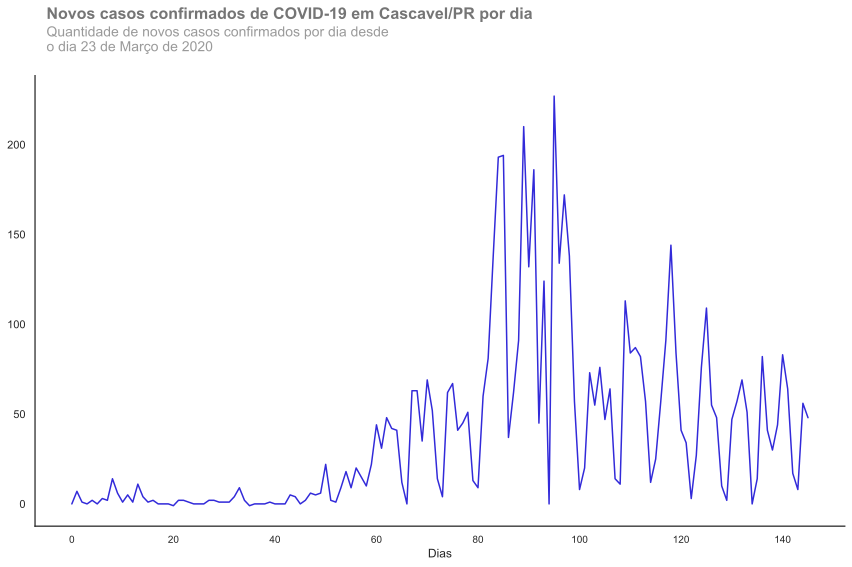

In [55]:
# Construindo o gráfico
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(df_cvel.casosNovos, color="#322ad9");

# Removendo ticks do eixo x
plt.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=True);

# Removendo os eixos
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Plotar título
ax.text(-5, 270, "Novos casos confirmados de COVID-19 em Cascavel/PR por dia", fontsize=16, fontweight='bold', color=cie);

# Plotar subtítulo
ax.text(-5, 252, "Quantidade de novos casos confirmados por dia desde\no dia 23 de Março de 2020", fontsize=14, color=cic);

# Formatação dos eixos
ax.set_xlabel('Dias', fontsize=12)

plt.tight_layout();

Como podemos perceber pelo gráfico, há bastante oscilação no número de novos casos confirmados de COVID-19 em Cascavel/PR, no entanto, pelo gráfico não fica claro se há tendência de crescimento ou diminuição na quantidade de novos casos.

**Número acumulado de óbitos pela COVID-19 em Cascavel/PR:**

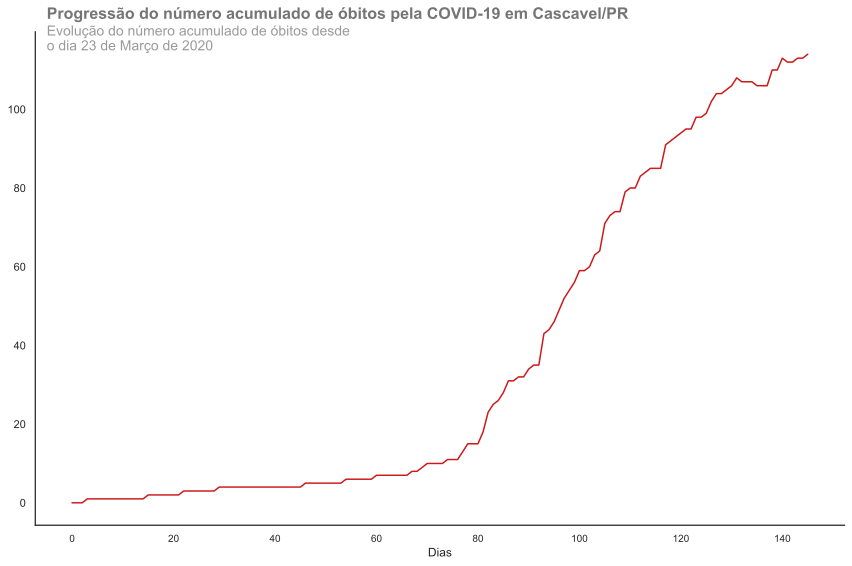

In [56]:
# Construindo o gráfico
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(df_cvel.obitosAcumulado, color="#cc1919");

# Removendo ticks do eixo x
plt.tick_params(axis='both', which='both', top=False, bottom=False, labelbottom=True);

# Removendo os eixos
ax.spines['top'].set_visible(False);
ax.spines['right'].set_visible(False);

# Plotar título
ax.text(-5, 123, "Progressão do número acumulado de óbitos pela COVID-19 em Cascavel/PR", fontsize=16, fontweight='bold', color=cie);

# Plotar subtítulo
ax.text(-5, 115, "Evolução do número acumulado de óbitos desde\no dia 23 de Março de 2020", fontsize=14, color=cic);

# Formatação dos eixos
ax.set_xlabel('Dias', fontsize=12)

plt.tight_layout();

Como podemos notar pelo gráfico, o número acumulado de óbitos ainda apresenta tendência de crescimento em Cascavel/PR.

Além disso:

In [57]:
print("Cascavel/PR teve o primeiro óbito após {} dias que o Brasil confirmou o primeiro caso e após {} dias que o estado do Paraná confirmou o primeiro caso.".format(int((df_cvel.loc[df_cvel.obitosAcumulado > 0, 'data'].iloc[0] - df.loc[df.casosAcumulado > 0, 'data'].iloc[0]) / (np.timedelta64(1, 'D'))), int((df_cvel.loc[df_cvel.obitosAcumulado > 0, 'data'].iloc[0] - df_pr.loc[(df_pr.municipio.isnull()) & (df_pr.casosAcumulado > 0), 'data'].iloc[0]) / (np.timedelta64(1, 'D')))))
print("E nesse dia foi confirmado {} óbito em Cascavel/PR.".format(df_cvel.loc[df_cvel.obitosAcumulado > 0, 'obitosAcumulado'].iloc[0]))

Cascavel/PR teve o primeiro óbito após 33 dias que o Brasil confirmou o primeiro caso e após 18 dias que o estado do Paraná confirmou o primeiro caso.
E nesse dia foi confirmado 1 óbito em Cascavel/PR.


**Número de novos óbitos pela COVID-19 em Cascavel/PR por dia:**

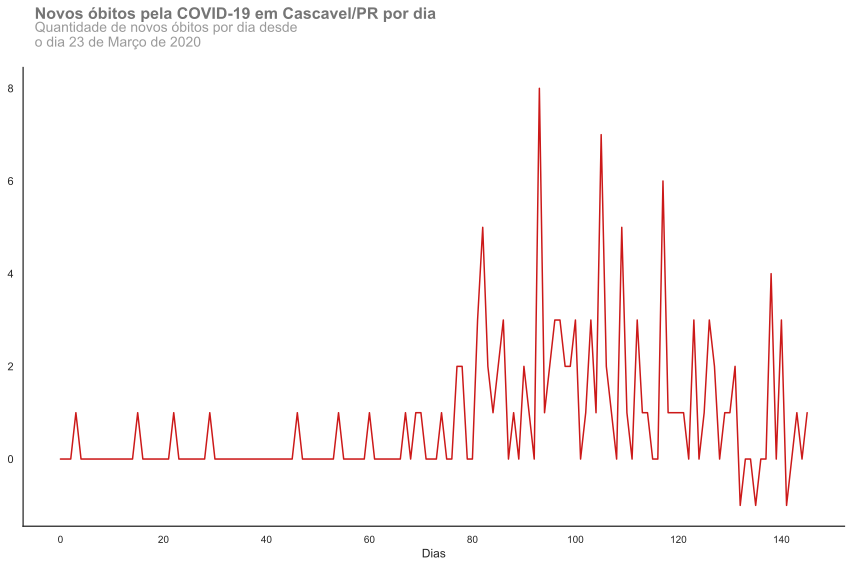

In [58]:
# Construindo o gráfico
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(df_cvel.obitosNovos, color="#cc1919");

# Removendo ticks do eixo x
plt.tick_params(axis='both', which='both', top=False, bottom=False, labelbottom=True);

# Removendo os eixos
ax.spines['top'].set_visible(False);
ax.spines['right'].set_visible(False);

# Plotar título
ax.text(-5, 9.5, "Novos óbitos pela COVID-19 em Cascavel/PR por dia", fontsize=16, fontweight='bold', color=cie);

# Plotar subtítulo
ax.text(-5, 8.9, "Quantidade de novos óbitos por dia desde\no dia 23 de Março de 2020", fontsize=14, color=cic);

# Formatação dos eixos
ax.set_xlabel('Dias', fontsize=12)

plt.tight_layout();

Como podemos perceber pelo gráfico, há bastante oscilação no número de novos óbitos pela COVID-19 em Cascavel/PR, ainda, nota-se que em alguns dias não houve óbitos registrados no município. Outro fator estranho a se notar é que existe alguns óbitos "negativos", no entanto isso provavelmente ocorre, pois foi notificado algum óbito como sendo devido à COVID-19 e, posteriormente, retificaram essa notificação.

## **Considerações finais**

Após a análise dos dados realizada, podemos inferir que:
- A região do Brasil com o maior número de casos confirmados de COVID-19 é a Sudeste e a com menor número é a Sul;
- O número acumulado de casos confirmados de COVID-19 no Brasil, no estado do Paraná e no município de Cascavel/PR ainda apresenta tendência de crescimento;
- A quantidade de novos casos de COVID-19 por dia se mostrou com bastante oscilação para o Brasil, o Paraná e Cascavel/PR, no entanto só mostrou uma tendência de crescimento para o Brasil e o Paraná;
- O número acumulado de óbitos pela COVID-19 no Brasil, no estado do Paraná e no município de Cascavel/PR ainda apresenta tendência de crescimento;
- A quantidade de novos óbitos COVID-19 por dia se mostrou com bastante oscilação para o Brasil, o Paraná e Cascavel/PR. Ainda, mostrando uma certa tendência de crecismento para o Brasil e o Paraná, já em Cascavel/PR percebe-se que alguns dias não houve óbitos registrados;
- Até o dia 19 de Agosto de 2020 o Brasil apresentou 3.456.652 número de casos confirmados de COVID-19, desses 2.615.254 de pessoas se recuperaram e 111.100 de pessoas vieram a falecer;
- O estado com o maior número acumulado de casos confirmados de COVID-19 é São Paulo e o com o menor número é o Acre;
- Ainda há municípios do Brasil que não registraram casos confirmados da doença e a maioria deles está em Minas Gerais;
- O município com o maior número acumulado de casos confirmados de COVID-19 é São Paulo/SP e o com menor número diversos municípios apresentaram apenas 1 caso confirmado.

## **Referências bibliográficas**

- Q&As on COVID-19 and related health topics. Disponível em: https://www.who.int/emergencies/diseases/novel-coronavirus-2019/question-and-answers-hub/
- Sobre a doença. Disponível em: https://coronavirus.saude.gov.br/sobre-a-doenca